In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv
import datetime as dt
import re
import time
import dateutil

headers = ['datetime','instanceId','maxCPUPercent']
data = '/home/joe/data/aws/out.txt'
df = pd.read_csv(data, names=headers)

In [186]:
dfG = df.groupby('instanceId')['maxCPUPercent'].mean()
dfG

instanceId
i-089389afc8097dac4    0.501436
i-09f0182499b5eaf27    4.235662
i-0ca364ec6656ff517    0.514968
Name: maxCPUPercent, dtype: float64

In [187]:
instances = df.instanceId.unique()
instances

array(['i-0ca364ec6656ff517', 'i-09f0182499b5eaf27',
       'i-089389afc8097dac4'], dtype=object)

In [191]:
dfP = df.pivot(index=df['datetime'], columns='instanceId')['maxCPUPercent']
dfP = dfP.fillna(0)
dfP = dfP.reset_index()
dfP['timestamps'] = pd.to_datetime(dfP['datetime'])
pattern = r':00\+00:00'
dfP = dfP.replace(to_replace=pattern, value='', regex=True)
dfP.head(4)
dfP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   datetime             60 non-null     object             
 1   i-089389afc8097dac4  60 non-null     float64            
 2   i-09f0182499b5eaf27  60 non-null     float64            
 3   i-0ca364ec6656ff517  60 non-null     float64            
 4   timestamps           60 non-null     datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(3), object(1)
memory usage: 2.5+ KB


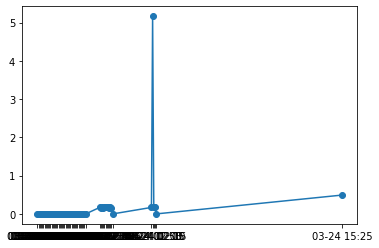

In [202]:
datestrings = dfP['datetime'].to_list()
dates = [dateutil.parser.parse(s) for s in datestrings]

y = dfP['i-089389afc8097dac4']
ax=plt.gca()
ax.set_xticks(dates)
xfmt = mdates.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(dates,y, "o-")
plt.show()